In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result=[]
with open('re.txt','r') as f:
    for line in f:
        l_list = line.split()
        result.append(l_list) #读取文件，先在记事本中删除 “-”

In [3]:
from pandas.core.frame import DataFrame
df=DataFrame(result)  #list 格式转化为 dataframe
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0.000,0.000,0.250,130,2.75,211,2.75,124,2.75,217,2.75,218,2.76,123,2.76,None,None,None,None
1,2,0.250,0.000,0.250,213,2.75,124,2.75,126,2.75,211,2.75,212,2.76,125,2.76,107,3.10,None,None
2,3,0.500,0.000,0.250,215,2.75,126,2.75,213,2.75,128,2.75,214,2.76,127,2.76,None,None,None,None
3,4,0.750,0.000,0.250,217,2.75,128,2.75,215,2.75,130,2.75,216,2.76,129,2.76,112,3.10,None,None
4,5,0.000,0.083,0.250,123,2.75,130,2.75,138,2.75,132,2.75,129,2.75,131,2.76,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,0.750,0.250,0.000,152,2.75,241,2.75,239,2.75,154,2.75,144,2.75,249,2.75,16,3.10,64,3.10
118,119,0.250,0.250,0.000,148,2.75,237,2.75,150,2.75,235,2.75,140,2.75,245,2.75,14,3.10,62,3.10
119,120,0.250,0.417,0.000,164,2.75,261,2.75,253,2.75,166,2.75,251,2.75,156,2.75,22,3.10,70,3.10
120,121,0.750,0.417,0.000,168,2.75,265,2.75,257,2.75,255,2.75,170,2.75,160,2.75,24,3.10,72,3.10


In [4]:
df_sort = df.sort_values(by=[2])  # 按y方向进行排序

In [5]:
dis_list=list(range(5,len(df.columns),2)) #包含键长的列
dis_list

[5, 7, 9, 11, 13, 15, 17, 19]

In [6]:
Bond_length=df_sort.loc[:,dis_list] #只保留包含键长的列

In [7]:
atom = np.zeros(len(Bond_length.index))
avg = np.zeros(len(Bond_length.index)) #平均键长
cv = np.zeros(len(Bond_length.index)) #成键数
non_none = 0
for i in range(len(Bond_length.index)):
    for j in range(len(Bond_length.columns)):
        if Bond_length.iloc[i,j] != None:
            non_none += 1;
            a = Bond_length.iat[i,j]
            a = float(a) #转换成浮点
            atom[i] += a
    avg[i] = atom[i]/non_none
    cv[i] = non_none
    non_none = 0
#print(avg)

In [8]:
#avg = avg.reshape(-1, 1)
#cv = cv.reshape(-1, 1)

In [9]:
df_sort.loc[:,'cv'] = cv
df_sort.loc[:,'avg'] = avg

In [10]:
df_sort.to_csv("re.csv") #保存文件为
df_sort

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,cv,avg
0,1,0.000,0.000,0.250,130,2.75,211,2.75,124,2.75,...,218,2.76,123,2.76,None,None,None,None,6.0,2.753333
50,51,0.500,0.000,0.750,311,2.75,222,2.75,309,2.75,...,310,2.76,223,2.76,None,None,None,None,6.0,2.753333
51,52,0.750,0.000,0.750,313,2.75,224,2.75,311,2.75,...,312,2.76,225,2.76,112,3.10,None,None,7.0,2.802857
49,50,0.250,0.000,0.750,309,2.75,220,2.75,222,2.75,...,308,2.76,221,2.76,107,3.10,None,None,7.0,2.802857
106,107,0.250,0.000,0.500,213,2.75,220,2.75,222,2.75,...,308,2.75,125,2.75,2,3.10,50,3.10,8.0,2.837500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,45,0.000,0.917,0.250,218,2.75,211,2.75,203,2.75,...,209,2.75,210,2.76,None,None,None,None,6.0,2.751667
94,95,0.500,0.917,0.750,310,2.75,311,2.75,303,2.75,...,312,2.75,302,2.76,103,3.10,None,None,7.0,2.801429
93,94,0.250,0.917,0.750,308,2.75,309,2.75,301,2.75,...,299,2.75,300,2.76,108,3.10,None,None,7.0,2.801429
92,93,0.000,0.917,0.750,314,2.75,307,2.75,299,2.75,...,305,2.75,306,2.76,None,None,None,None,6.0,2.751667


In [11]:
x = np.array(df_sort.loc[:, [1]])
x= x.astype(float)
y = np.array(df_sort.loc[:, [2]])
y = y.astype(float)
z = np.array(df_sort.loc[:, [3]])
z = z.astype(float)

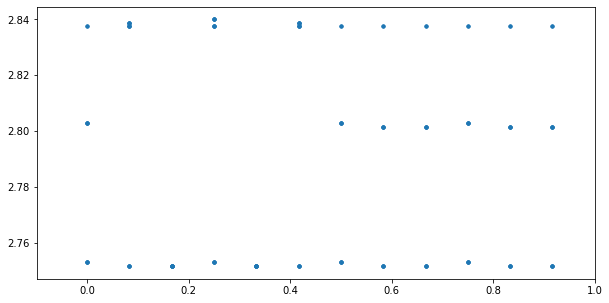

In [12]:
plt.figure(figsize=(10,5))
plt.xlim(-0.1,1)
plt.scatter(y,avg,s=10)
plt.savefig('re.png', format='png',transparent=True)
plt.show()

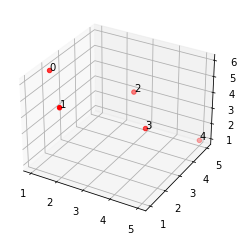

In [13]:
from mpl_toolkits.mplot3d import Axes3D


x=[1,2,3,4,5]
y=[2,1,4,3,5]
z=[6,5,4,3,1]


ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x, y, z,c='r',marker='o')
for i in range(len(x)):
    ax.text(x[i],y[i],z[i],i)

In [14]:
ir=pd.read_csv('ir-0.csv',index_col=[0])